In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt


In [2]:
data = pd.read_csv("C:/Users/Admin/Downloads/amazon_delivery.csv")

data.head(5)  #shows the head of the data

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [3]:
data.shape

(43739, 16)

In [4]:
data.info()   #infomartion about the data like (data type, missing value presence , counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [5]:
data.duplicated().sum()  #To check duplicates presence

0

In [6]:
data.isnull().sum()   #to check the null value presence

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [7]:
columns = ['Traffic', 'Category', 'Weather', 'Vehicle', 'Area']
for col in columns:
    print(f"\nUnique values in '{col}':")
    print(data[col].astype(str).str.strip().unique())



Unique values in 'Traffic':
['High' 'Jam' 'Low' 'Medium' 'NaN']

Unique values in 'Category':
['Clothing' 'Electronics' 'Sports' 'Cosmetics' 'Toys' 'Snacks' 'Shoes'
 'Apparel' 'Jewelry' 'Outdoors' 'Grocery' 'Books' 'Kitchen' 'Home'
 'Pet Supplies' 'Skincare']

Unique values in 'Weather':
['Sunny' 'Stormy' 'Sandstorms' 'Cloudy' 'Fog' 'Windy' 'nan']

Unique values in 'Vehicle':
['motorcycle' 'scooter' 'van' 'bicycle']

Unique values in 'Area':
['Urban' 'Metropolitian' 'Semi-Urban' 'Other']


In [8]:
#Handling missing and NaN values
data['Traffic'].replace('NaN ', np.nan, inplace=True)
data.dropna(inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11256\4178291434.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Traffic'].replace('NaN ', np.nan, inplace=True)


In [9]:
data.shape


(43594, 16)

In [10]:
from geopy.distance import geodesic

In [11]:
# Function to calculate geopy distance
def calculate_geopy(row):
    lat=(row['Store_Latitude'], row['Store_Longitude']) 
    lon=(row['Drop_Latitude'], row['Drop_Longitude'])
    return geodesic(lat,lon).kilometers

# Apply geodesic formula row-wise
data['Distance_km'] = data.apply(calculate_geopy, axis=1)


In [12]:
data.drop(columns=['Store_Latitude','Store_Longitude','Drop_Latitude','Drop_Longitude'], inplace=True)

In [13]:
# Convert to datetime
data['Order_Time'] = pd.to_datetime(data['Order_Time'], errors='coerce')
data['Pickup_Time'] = pd.to_datetime(data['Pickup_Time'], errors='coerce')
data['Pickup_Delay'] = (data['Pickup_Time'] - data['Order_Time']).dt.total_seconds() /60  # in minutes
data.drop(columns=['Order_Time','Pickup_Time'], inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_11256\3647066264.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Order_Time'] = pd.to_datetime(data['Order_Time'], errors='coerce')
C:\Users\Admin\AppData\Local\Temp\ipykernel_11256\3647066264.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Pickup_Time'] = pd.to_datetime(data['Pickup_Time'], errors='coerce')


In [14]:
# Convert to datetime
data['Order_Date'] = pd.to_datetime(data['Order_Date'], errors='coerce')

# Extract features
data['Order_Month'] = data['Order_Date'].dt.month
data['Order_Day'] = data['Order_Date'].dt.day
data['Order_Weekday'] = data['Order_Date'].dt.day_name()
data.drop(columns=['Order_Date'], inplace=True)

In [15]:
data.drop('Order_ID', axis=1, inplace=True)

In [16]:
data.isnull().sum()

Agent_Age        0
Agent_Rating     0
Weather          0
Traffic          0
Vehicle          0
Area             0
Delivery_Time    0
Category         0
Distance_km      0
Pickup_Delay     0
Order_Month      0
Order_Day        0
Order_Weekday    0
dtype: int64

<Axes: >

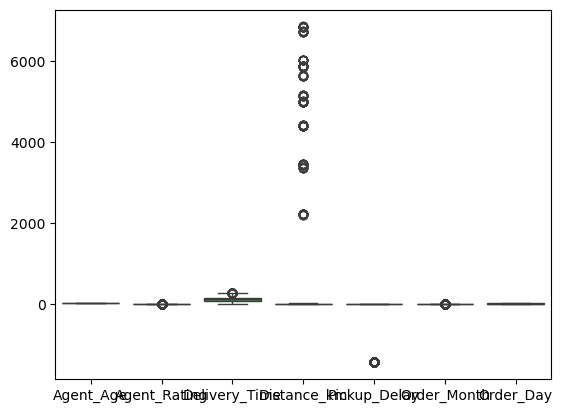

In [17]:
sns.boxplot(data)  

In [18]:
Q1 = data['Distance_km'].quantile(0.25)
Q3 = data['Distance_km'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
outliers = data[(data['Distance_km'] < lower_bound) | (data['Distance_km'] > upper_bound)]
print("Outlier count:", outliers.shape[0])



Lower Bound: -8.855969489603641
Upper Bound: 27.17094986184372
Outlier count: 151


In [19]:
Q1 = data['Delivery_Time'].quantile(0.25)
Q3 = data['Delivery_Time'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
outliers = data[(data['Delivery_Time'] < lower_bound) | (data['Delivery_Time'] > upper_bound)]
print("Outlier count:", outliers.shape[0])

Lower Bound: -15.0
Upper Bound: 265.0
Outlier count: 79


In [20]:
numeric_cols=data.select_dtypes(include='number').columns
for col in numeric_cols:  #removing outliers for numeric columns 
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


<Axes: >

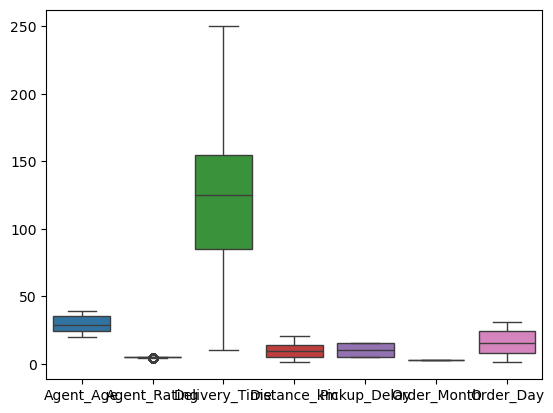

In [21]:
sns.boxplot(data)

In [22]:
data.to_csv("Processed_data")

In [23]:
# Clean column names
data.columns = data.columns.str.strip()



In [24]:
from sklearn.preprocessing import LabelEncoder

columns = ['Traffic', 'Category', 'Weather', 'Vehicle', 'Area','Order_Weekday']

# Use a separate encoder for each column
label_encoders = {}

for col in columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  


In [25]:
data.head()

,Agent_Age,Agent_Rating,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km,Pickup_Delay,Order_Month,Order_Day,Order_Weekday
0,37,4.9,4,0,0,3,120,2,3.020737,15.0,3,19,2
1,34,4.5,3,1,1,0,165,4,20.143737,5.0,3,25,0
2,23,4.4,2,2,0,3,130,14,1.549693,15.0,3,19,2
4,32,4.6,0,0,1,0,150,15,6.197898,15.0,3,26,2
5,22,4.8,0,1,0,3,130,15,4.602205,10.0,3,11,0


In [26]:
data.describe()  #statistics of Float values

,Agent_Age,Agent_Rating,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km,Pickup_Delay,Order_Month,Order_Day,Order_Weekday
count,29038.000000,29038.000000,29038.000000,29038.000000,29038.000000,29038.000000,29038.000000,29038.000000,29038.000000,29038.000000,29038.0,29038.000000,29038.000000
mean,29.452924,4.665228,2.471968,1.736311,0.495041,0.713617,122.796818,7.485949,9.497310,9.973483,3.0,15.720366,3.133170
std,5.765884,0.253701,1.710177,0.949058,0.642611,1.254704,50.547955,4.617765,5.556006,4.081131,0.0,9.012027,1.995967
min,20.000000,3.900000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,1.487802,5.000000,3.0,1.000000,0.000000
25%,24.000000,4.600000,1.000000,1.000000,0.000000,0.000000,85.000000,4.000000,4.647989,5.000000,3.0,8.000000,1.000000
50%,29.000000,4.700000,2.000000,2.000000,0.000000,0.000000,125.000000,7.000000,9.107798,10.000000,3.0,15.000000,3.000000
75%,35.000000,4.900000,4.000000,3.000000,1.000000,1.000000,155.000000,12.000000,13.591761,15.000000,3.0,24.000000,5.000000
max,39.000000,5.000000,5.000000,3.000000,2.000000,3.000000,250.000000,15.000000,20.839227,15.000000,3.0,31.000000,6.000000


In [27]:
data.shape

(29038, 13)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29038 entries, 0 to 43738
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Agent_Age      29038 non-null  int64  
 1   Agent_Rating   29038 non-null  float64
 2   Weather        29038 non-null  int32  
 3   Traffic        29038 non-null  int32  
 4   Vehicle        29038 non-null  int32  
 5   Area           29038 non-null  int32  
 6   Delivery_Time  29038 non-null  int64  
 7   Category       29038 non-null  int32  
 8   Distance_km    29038 non-null  float64
 9   Pickup_Delay   29038 non-null  float64
 10  Order_Month    29038 non-null  int32  
 11  Order_Day      29038 non-null  int32  
 12  Order_Weekday  29038 non-null  int32  
dtypes: float64(3), int32(8), int64(2)
memory usage: 2.2 MB


In [29]:
cleaned_data =data.to_csv('cleaned_data')